<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part4_gamma_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=eeffaeeead01bd499c5bc89a7b86fe6b572e061a23cf026c4854a9152685e4bf
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma, alpha, mu):
    S, E, I, R = y
    dSdt = mu - (beta * S * I) - mu*S
    dEdt = (beta * S * I)  - (mu + alpha)*E
    dIdt = (alpha*E) - (mu + gamma)*I
    dRdt = gamma*I   -  mu*R
    return dSdt, dEdt, dIdt, dRdt

In [3]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [4]:
""" alpha is a list of 1000 random number in (0.05,1) """

import random
alpha = []
for i in range(1000):
    alpha.append(random.uniform(0, 1))
    


In [5]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))

In [6]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i])

In [7]:
mu =  0.0133

In [8]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])  
  
Beta = pd.DataFrame(beta_list)

In [9]:
gamma_list = []
for i in range(1000):
  for j in range(10):
    gamma_list.append(gamma[i])  
  
Gamma = pd.DataFrame(gamma_list)

In [10]:
alpha_list = []
for i in range(1000):
  for j in range(10):
    alpha_list.append(alpha[i])  
  
Alpha = pd.DataFrame(alpha_list)

In [11]:
""" P, Q, M, T are the list of S, E, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma,alpha,mu)."""
    
P = []
Q = []
M = []
T = []
for i in range(1000): #Plotted for 2 sets
  N = 1
  S0, E0, I0, R0 = 0.99,0.005,0.005,0   # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, E0, I0, R0 # Initial conditions vector
  # Integrate the SEIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i], alpha[i],mu))
  S, E, I, R = ret.T
  P.append(S)
  Q.append(E)
  M.append(I)
  T.append(R)

  

In [12]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
E_value = pd.DataFrame(Q)
I_value = pd.DataFrame(M)
R_value = pd.DataFrame(T)

In [13]:
""" S_list, E_list, I_list, R_list are the list of S, E, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, E_list, I_list, R_list are  lists of 1000 itens and each item itself list of 10 values 
    and S_actual, E_actual, I_actual, R_actual are list of S, E, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """


S_list = []
S_actual = []
E_list = []
E_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  E_list.append(E_value[p].iloc[i].to_list())
  E_actual.append(E_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [14]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

exposed_list = []
for i in range(1000):
 exposed_list = exposed_list+E_list[i] 

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]

susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

exposedactual_list = []
for i in range(1000):
 exposedactual_list = exposedactual_list+E_actual[i]  

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [15]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(exposed_list)
df_3 = pd.DataFrame(infected_list)
df_4 = pd.DataFrame(recov_list)
df_5 = pd.DataFrame(susactual_list)
df_6 = pd.DataFrame(exposedactual_list)
df_7 = pd.DataFrame(infectedactual_list)
df_8 = pd.DataFrame(recovactual_list)

In [16]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,Beta,Gamma,Alpha], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266385,0.001144,0.001447,0.731024,0.275378,0.001022,0.001270,0.722331,1.921352,0.716769,0.751738
1,0.384791,0.000539,0.000560,0.614110,0.392504,0.000543,0.000559,0.606394,1.921352,0.716769,0.751738
2,0.407598,0.000563,0.000568,0.591272,0.414975,0.000579,0.000578,0.583867,1.921352,0.716769,0.751738
3,0.275378,0.001022,0.001270,0.722331,0.284313,0.000922,0.001126,0.713638,1.921352,0.716769,0.751738
4,0.488398,0.021544,0.019559,0.470500,0.476269,0.023370,0.021469,0.478893,1.921352,0.716769,0.751738


In [17]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7,8,9,10]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [18]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.155949,0.004477,0.006143,0.856830,0.174300,0.004023,0.005422,0.852771,0.654931,0.717712,0.752663
1,0.292724,0.002093,0.002255,0.719795,0.308298,0.002123,0.002271,0.715898,0.654931,0.717712,0.752663
2,0.319069,0.002187,0.002287,0.693027,0.334006,0.002265,0.002359,0.689303,0.654931,0.717712,0.752663
3,0.166336,0.003997,0.005367,0.846641,0.184523,0.003628,0.004786,0.842509,0.654931,0.717712,0.752663
4,0.412404,0.084901,0.085600,0.551471,0.404129,0.092699,0.094897,0.565371,0.654931,0.717712,0.752663
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.823057,0.229671,0.068873,0.096218,0.812082,0.244368,0.073785,0.104889,0.330535,0.487184,0.151061
9996,0.341530,0.179631,0.064372,0.600894,0.349638,0.175348,0.062990,0.605516,0.330535,0.487184,0.151061
9997,0.769012,0.282961,0.086188,0.130586,0.756647,0.298287,0.091544,0.141320,0.330535,0.487184,0.151061
9998,0.430152,0.407791,0.139784,0.422987,0.425609,0.404386,0.139671,0.438537,0.330535,0.487184,0.151061


In [19]:
data_scaled[[0,1,2,3,4,5,6,7,8,9,10]] = data_scaled[[0,1,2,3,4,5,6,7,8,9,10]].apply(lambda x: x*100) 

In [20]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,15.594923,0.447675,0.614317,85.683032,17.430037,0.402323,0.542154,85.277057,65.493068,71.771210,75.266271
1,29.272393,0.209327,0.225511,71.979536,30.829833,0.212288,0.227141,71.589755,65.493068,71.771210,75.266271
2,31.906947,0.218683,0.228663,69.302686,33.400631,0.226545,0.235889,68.930270,65.493068,71.771210,75.266271
3,16.633644,0.399677,0.536704,84.664070,18.452278,0.362756,0.478628,84.250868,65.493068,71.771210,75.266271
4,41.240426,8.490104,8.560024,55.147085,40.412891,9.269908,9.489684,56.537090,65.493068,71.771210,75.266271
...,...,...,...,...,...,...,...,...,...,...,...
9995,82.305724,22.967096,6.887265,9.621763,81.208206,24.436810,7.378463,10.488874,33.053534,48.718439,15.106111
9996,34.152954,17.963063,6.437202,60.089354,34.963782,17.534763,6.299037,60.551615,33.053534,48.718439,15.106111
9997,76.901243,28.296117,8.618827,13.058572,75.664655,29.828653,9.154382,14.131967,33.053534,48.718439,15.106111
9998,43.015234,40.779072,13.978382,42.298734,42.560876,40.438592,13.967139,43.853700,33.053534,48.718439,15.106111


In [21]:
X = data_scaled[[0,1,2,3,4,5,6,7]]
y = data_scaled[9]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [24]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [27]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [28]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[02:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 8.326421400000001 for 384 rounds
CV with max_depth=9, min_child_weight=6
[02:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squared

In [29]:
params['max_depth'] = 10
params['min_child_weight'] = 7

In [30]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[02:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 8.2530924 for 487 rounds
CV with subsample=1.0, colsample=0.9
[02:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:

In [31]:
params['subsample'] = 0.7
params['colsample_bytree'] = 1

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
CV with eta=0.3
[02:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 54.7 s, sys: 191 ms, total: 54.9 s
Wall time: 27.7 s
	MAE 8.01862 for 446 rounds

CV with eta=0.2
[02:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:53] WARNING: /workspace/src/objective

In [32]:
params['eta'] = .1

In [33]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[06:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:41.8099
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:37.711
[2]	DEV-mae:34.0518
[3]	DEV-mae:30.8066
[4]	DEV-mae:27.964
[5]	DEV-mae:25.4745
[6]	DEV-mae:23.296
[7]	DEV-mae:21.3414
[8]	DEV-mae:19.6496
[9]	DEV-mae:18.1294
[10]	DEV-mae:16.8046
[11]	DEV-mae:15.6563
[12]	DEV-mae:14.6715
[13]	DEV-mae:13.8033
[14]	DEV-mae:13.0727
[15]	DEV-mae:12.4147
[16]	DEV-mae:11.8651
[17]	DEV-mae:11.3669
[18]	DEV-mae:10.9982
[19]	DEV-mae:10.658
[20]	DEV-mae:10.3746
[21]	DEV-mae:10.1352
[22]	DEV-mae:9.91923
[23]	DEV-mae:9.77017
[24]	DEV-mae:9.61397
[25]	DEV-mae:9.48321
[26]	DEV-mae:9.39374
[27]	DEV-mae:9.28161
[28]	DEV-mae:9.18686
[29]	DEV-mae:9.10878
[30]	DEV-mae:9.04609
[31]	DEV-mae:9.00431
[32]	DEV-mae:8.96368
[33]	DEV-mae:8.92129
[34]	DEV-mae:8.88509
[35]	DEV-mae:8.86139
[36]	DEV-mae:8.81644
[37]	DEV-mae:8.78455
[38]	DEV-mae:8.76213
[39]	DEV-mae:

In [34]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[06:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:44.8737
[1]	Test-mae:40.5246
[2]	Test-mae:36.6564
[3]	Test-mae:33.14
[4]	Test-mae:30.0601
[5]	Test-mae:27.2964
[6]	Test-mae:24.8318
[7]	Test-mae:22.6975
[8]	Test-mae:20.8343
[9]	Test-mae:19.1812
[10]	Test-mae:17.7511
[11]	Test-mae:16.5286
[12]	Test-mae:15.4351
[13]	Test-mae:14.4732
[14]	Test-mae:13.6236
[15]	Test-mae:12.8775
[16]	Test-mae:12.2736
[17]	Test-mae:11.7363
[18]	Test-mae:11.3078
[19]	Test-mae:10.9791
[20]	Test-mae:10.6822
[21]	Test-mae:10.4231
[22]	Test-mae:10.1917
[23]	Test-mae:10.0296
[24]	Test-mae:9.88007
[25]	Test-mae:9.73666
[26]	Test-mae:9.63426
[27]	Test-mae:9.52144
[28]	Test-mae:9.4098
[29]	Test-mae:9.33251
[30]	Test-mae:9.27215
[31]	Test-mae:9.2165
[32]	Test-mae:9.13881
[33]	Test-mae:9.1
[34]	Test-mae:9.05177
[35]	Test-mae:9.00638
[36]	Test-mae:8.98554
[37]	Test-mae:8.96585
[38]	Test-mae:8.94937
[39]	Test-mae:8.92531
[40]	Test-m

In [35]:
mean_absolute_error(best_model.predict(dtest), y_test1)

7.189345609838452

In [36]:
best_model.save_model("my_model.model")

In [37]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[06:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


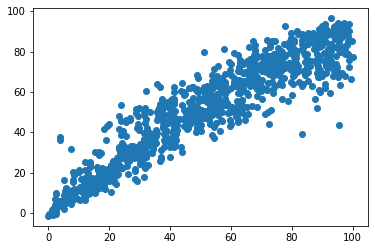

In [38]:
plt.scatter(y_test1,p)

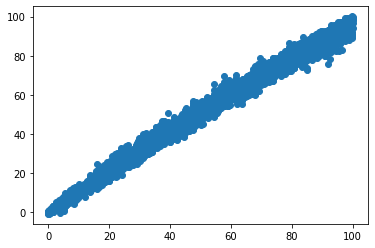

In [39]:
plt.scatter(y_train,q)

In [40]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.3931159015994408
R2 score of training set is 0.9929421355923471


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.952131616895173
R2 score of test set is 0.8748598463621535
